# Colab Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Defining Project Root

In [2]:
# use "./" instead if running this notebook locally at project root and all required resource files are downloaded.
project_root = "/content/drive/MyDrive/"

# Import Section

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import math
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, accuracy_score, precision_score

import matplotlib.pyplot as plt

%matplotlib inline

# Defining Input Parameters

In [4]:
classes_name = ['acoustic',
 'folk',
 'blues',
 'jazz',
 'classical',
 'opera',
 'club',
 'instrumental',
 'country',
 'electronic',
 'hip-hop',
 'rock',
 'metal',
 'pop',
 'r&b/soul',
 'reggae',
 'latin',
 'industrial']
n_classes = len(classes_name)

In [5]:
parent_dir = project_root + 'music_data'
X = np.load(parent_dir + "/" + 'mfccs.npy')
y = np.load(parent_dir + "/" +  'y.npy')

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=1234)

In [7]:
def print_class_count(y_train,y_val,y_test):
    classes_train, counts_train = np.unique(y_train, return_counts=True)
    classes_val, counts_val = np.unique(y_val, return_counts=True)
    classes_test, counts_test = np.unique(y_test, return_counts=True)
    
    print(
    """
    train class: {}
    train count: {}
    val class: {}
    val count: {}
    test class: {}
    test count: {}
    """
    .format(classes_train,counts_train,classes_val,counts_val,classes_test,counts_test))

In [8]:
print_class_count(y_train, y_val, y_test)


    train class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    train count: [432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432 432]
    val class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    val count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144]
    test class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
    test count: [144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144 144]
    


In [9]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# CNN Model

## Model #1

In [10]:
batch_size = 128
epochs = 50

In [11]:
model = Sequential([
    Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(padding="same"),
    Dropout(0.25),

    Conv2D(128, (3,3), activation="relu"),
    Conv2D(128, (3,3), activation="relu"),
    GlobalAveragePooling2D(),
    Dropout(0.25),
    
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax"),
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 640, 64)       640       
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 638, 64)       36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 319, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 319, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 317, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 315, 128)       147584    
                                                        

In [12]:
history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
)

Epoch 1/50
61/61 [==============================] - 34s 308ms/step - loss: 2.6988 - accuracy: 0.1331 - val_loss: 2.4050 - val_accuracy: 0.2207
Epoch 2/50
61/61 [==============================] - 16s 268ms/step - loss: 2.3858 - accuracy: 0.2153 - val_loss: 2.2721 - val_accuracy: 0.2589
Epoch 3/50
61/61 [==============================] - 16s 262ms/step - loss: 2.2683 - accuracy: 0.2479 - val_loss: 2.1756 - val_accuracy: 0.2843
Epoch 4/50
61/61 [==============================] - 16s 263ms/step - loss: 2.2012 - accuracy: 0.2735 - val_loss: 2.1270 - val_accuracy: 0.2986
Epoch 5/50
61/61 [==============================] - 16s 262ms/step - loss: 2.1561 - accuracy: 0.2882 - val_loss: 2.0648 - val_accuracy: 0.3326
Epoch 6/50
61/61 [==============================] - 16s 262ms/step - loss: 2.0948 - accuracy: 0.3090 - val_loss: 2.0376 - val_accuracy: 0.3372
Epoch 7/50
61/61 [==============================] - 16s 261ms/step - loss: 2.0479 - accuracy: 0.3290 - val_loss: 1.9890 - val_accuracy: 0.3499

# Plotting Loss and Accuracy Graph

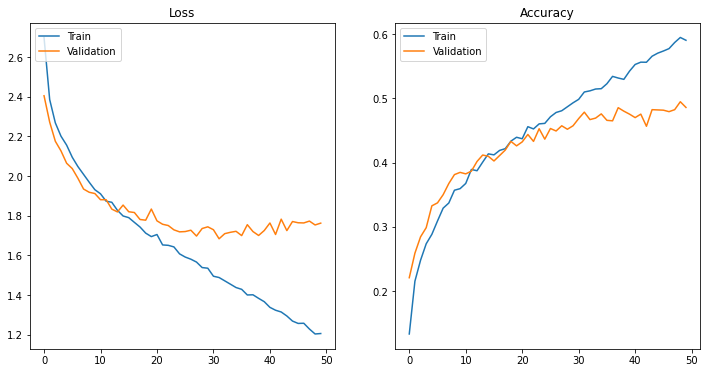

In [13]:
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(12,6)

axis[0].plot(history.history['loss'])
axis[0].plot(history.history['val_loss'])
axis[0].set_title("Loss")
axis[0].legend(['Train', 'Validation'], loc='upper left')

axis[1].plot(history.history['accuracy'])
axis[1].plot(history.history['val_accuracy'])
axis[1].set_title("Accuracy")
axis[1].legend(['Train', 'Validation'], loc='upper left')

# Testing Model

In [14]:
y_predict = model.predict(X_test)

81/81 [==============================] - 1s 13ms/step


In [15]:
y_predict_argmax = np.argmax(y_predict, 1)

In [16]:
y_test_argmax = np.argmax(y_test, 1)

# Confusion Matrix

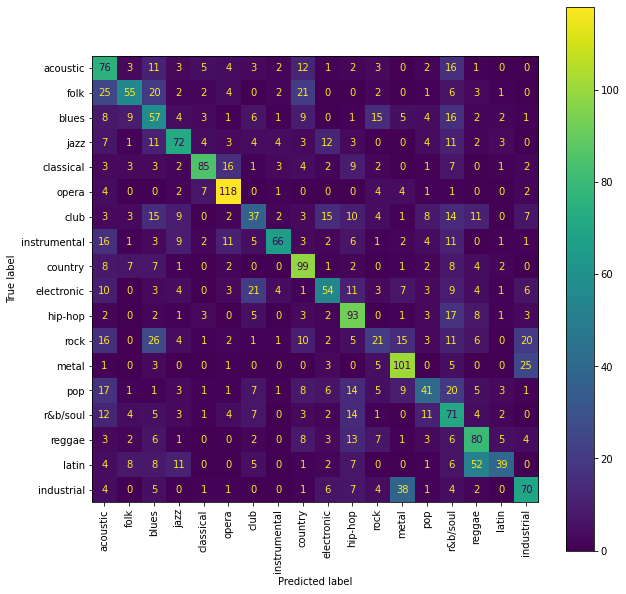

In [17]:
cm = confusion_matrix(y_test_argmax, y_predict_argmax)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay(cm, display_labels=classes_name).plot(ax=ax, xticks_rotation=90)

# Additional Metrics Illustration

In [18]:
precision = precision_score(y_test_argmax, y_predict_argmax, average=None)
recall = recall_score(y_test_argmax, y_predict_argmax, average=None)
f1 = f1_score(y_test_argmax, y_predict_argmax, average=None)

accuracy = accuracy_score(y_test_argmax, y_predict_argmax)
print("Accuracy on test set: " + str(accuracy))

Accuracy on test set: 0.47646604938271603


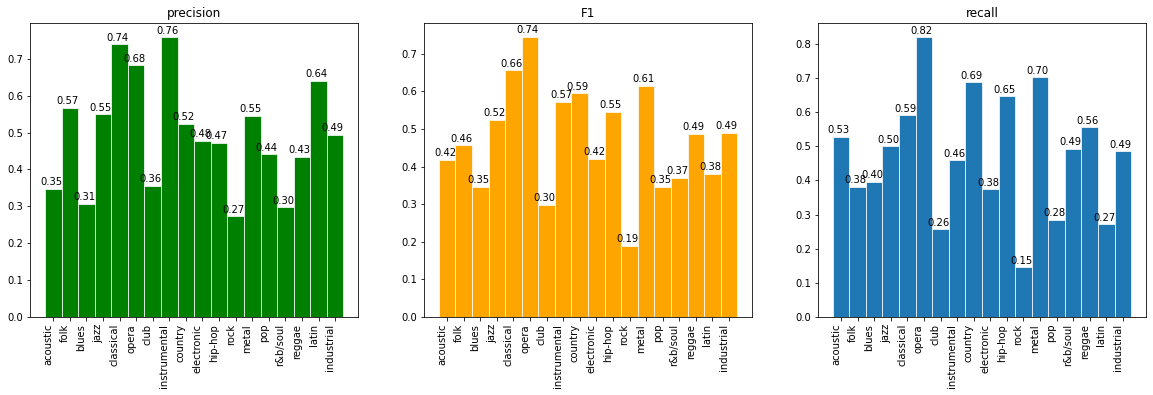

In [19]:
fig, axis = plt.subplots(1, 3)
fig.set_size_inches(20,6)
fig.autofmt_xdate(rotation=90)

axis[0].bar(classes_name, precision, width=1, edgecolor="white", linewidth=0.7, color="green")
axis[0].set_title("precision")
for i in range(len(precision)):
    axis[0].text(i - 0.8, precision[i] + 0.01, "%.2f" % precision[i])

axis[1].bar(classes_name, f1, width=1, edgecolor="white", linewidth=0.7, color="orange")
axis[1].set_title("F1")
for i in range(len(f1)):
    axis[1].text(i - 0.8, f1[i] + 0.01, "%.2f" % f1[i])

axis[2].bar(classes_name, recall, width=1, edgecolor="white", linewidth=0.7)
axis[2].set_title("recall")
for i in range(len(recall)):
    axis[2].text(i - 0.8, recall[i] + 0.01, "%.2f" % recall[i])

plt.show()